# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

# Leser datasett

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../Task5/agaricus-lepiota.data', thousands=',').dropna()

#X = df.drop(columns='edibility')
X = df
X = pd.get_dummies(X, columns=X.columns)
print(X.shape)

(8124, 119)


# Gjør PCA decomposition
for å få 3 dimensjoner

In [23]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)
print(Xpca.shape)

(8124, 3)


# Evaluering
Her finner jeg ut hvilken mengde med clusters som er best for å dele inn datasettet. Evalueringsmetoden jeg bruker er silhouette score.

In [24]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import numpy as np

clusters = 15
scores = np.zeros(clusters-2)

for i in range(2, clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Xpca)
    y_kmeans = kmeans.predict(Xpca)
    score=metrics.silhouette_score(Xpca, y_kmeans)
    scores[i-2]=score
    print("Number of clusters: ", i, " Score: ", score)
    
best_n_clusters = np.argmax(scores)
print("\n\nThe optimal number of clusters is: ", best_n_clusters+2)

Number of clusters:  2  Score:  0.4757493523084153
Number of clusters:  3  Score:  0.6225963109807424
Number of clusters:  4  Score:  0.6731107559366393
Number of clusters:  5  Score:  0.6655998840555898
Number of clusters:  6  Score:  0.6690443459483342
Number of clusters:  7  Score:  0.6722680765386102
Number of clusters:  8  Score:  0.5792022639769497
Number of clusters:  9  Score:  0.5831117519598177
Number of clusters:  10  Score:  0.49912384884127226
Number of clusters:  11  Score:  0.475971520996827
Number of clusters:  12  Score:  0.47582724809106147
Number of clusters:  13  Score:  0.40756958873926147
Number of clusters:  14  Score:  0.47756905948907374


The optimal number of clusters is:  4


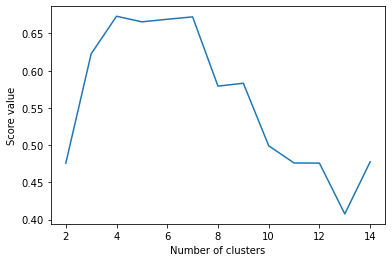

In [25]:
x_values = np.arange(2, len(scores) + 2)

plt.plot(x_values, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Score value")
plt.show()

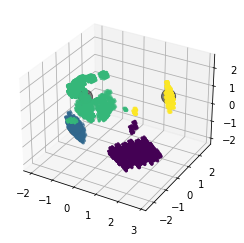

In [26]:
kmeans = KMeans(n_clusters=best_n_clusters+2)

kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:,2], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

plt.show()

In [27]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import numpy as np

clusters = 18
scores = np.zeros(clusters-2)

for i in range(2, clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    score=metrics.silhouette_score(X, y_kmeans)
    scores[i-2]=score
    print("Number of clusters: ", i, " Score: ", score)
    
best_n_clusters = np.argmax(scores)
print("\n\nThe optimal number of clusters is: ", best_n_clusters+2)

Number of clusters:  2  Score:  0.1803249719513766
Number of clusters:  3  Score:  0.22832286773950566
Number of clusters:  4  Score:  0.22973544705666138
Number of clusters:  5  Score:  0.26026136616756645
Number of clusters:  6  Score:  0.2773067927388477
Number of clusters:  7  Score:  0.2875120265174982
Number of clusters:  8  Score:  0.29366806325350914
Number of clusters:  9  Score:  0.30155382812016246
Number of clusters:  10  Score:  0.19100064144825818
Number of clusters:  11  Score:  0.2539832707358647
Number of clusters:  12  Score:  0.21233570543805907
Number of clusters:  13  Score:  0.20682588631815976
Number of clusters:  14  Score:  0.20687497259907345
Number of clusters:  15  Score:  0.16740423266385548
Number of clusters:  16  Score:  0.17394717930076056
Number of clusters:  17  Score:  0.13075857324932663


The optimal number of clusters is:  9


# Plotter evalueringen

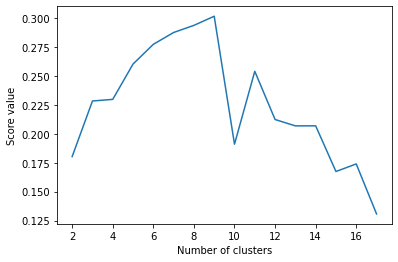

In [28]:
x_values = np.arange(2, len(scores) + 2)

plt.plot(x_values, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Score value")
plt.show()

# Visualisering av data med optimal antal cluster

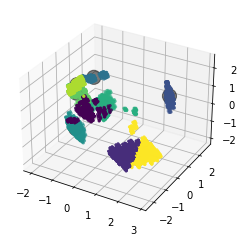

In [29]:
kmeans = KMeans(n_clusters=best_n_clusters+2)

kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:,2], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

plt.show()

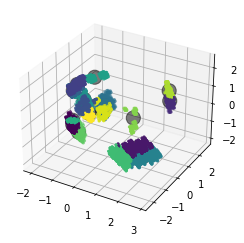

In [30]:
kmeans = KMeans(n_clusters=17)

kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:,2], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

plt.show()